### 연습문제 (Q9.1)
- 어느 범죄학 연구자가 인구밀도와 절도발생률 간의 관계를 연구하면서 다음의 16개 도시의 자료를 수집하였다. 
- X는 해당 도시의 단위면적당 인구밀도를, Y는 이전년도의 10만명당 절도범죄의 발생횟수를 조사한 것이다.
- 파이썬을 이용하여 회귀분석식을 구하고, 각자 회귀분석식에 대한 평가를 진행해보아라.
- 데이터:
    - X:{ 59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70}
    - Y:{ 209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204}

1. 회귀분석식을구하여라
2. R_squared 값을 구하여라(적합도, goodness of fit)
3. X값이 58일때 Y값을 예측하여라.

[방법]
1. 단일회귀분석 프로그램을 사용한다.
2. 𝛼+𝛽𝑋i + 𝜀i 의 각 계수를 구한다.
3. linear_regression.score 값을 구한다.

In [1]:
# scikit learn 패키지에서 필요한 모델인 linear_model이라는 모듈을 불러들임
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# matplotlib에는 사전에 정의한 많은 스타일이 있다.
# ggplot도 그 중 하나임
# R에서 사용하는 ggplot을 흉내내는 스타일을 사용하겠다고 선언
matplotlib.style.use('ggplot')

In [2]:
# 2차원 배열을 만들어 'data'라는 변수에 할당
data = {'x' : [59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70],
        'y' : [209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204]}

<AxesSubplot:xlabel='x', ylabel='y'>

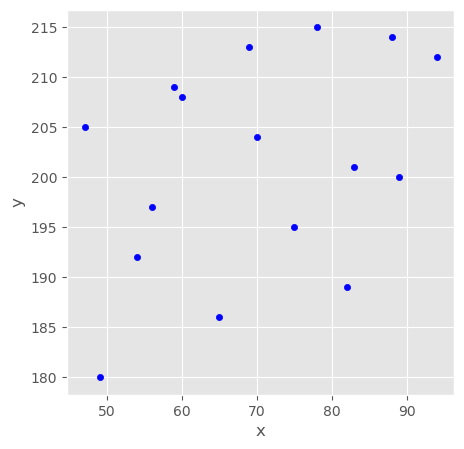

In [3]:
# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)

data.plot(kind="scatter",  # 산점도를 그리시오
          x='x',           # 가로축은 x라고 라벨을 붙임
          y='y',           # 세로축은 y라고 라벨을 붙임
          figsize=(5,5),   # 가로 5인치, 세로 5인치 크기의 박스를 설정
          color="blue")    # 산점도 상의 점 색상을 파랑색으로 지정

In [4]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# Linearregression()의 fit()이라는 함수를 이용하여 선형회귀 모델 훈련 실행
# x: 독립변수는 y: 종속변수
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])

# 선형 그래프 만들어냄
# 선형 회귀식의 세로축 절편
print('a value = ', linear_regression.intercept_)
# 선형 회귀식의 기울기
print('b balue =', linear_regression.coef_)

a value =  182.97249943723267
b balue = [0.26157425]


## 1. 회귀분석식을구하여라
y = 0.26x + 182.97

In [11]:
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))
# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다.
print(prediction)
residuals = data["y"] - prediction;  
print(residuals)
# 변수의 갯수(6개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25% 값, 50% 값, 75% 값, 최대값을 출력한다.
print(residuals.describe())
# 잔차를 제곱하여 전체를 합침. 결과값을 SSE라는 변수에 할당
SSE=sse= (residuals**2).sum()
print("SSE = ", SSE);  
# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data["y"]-data["y"].mean())**2).sum()
print("SST = ", SST)
# 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)


# => [50, 58, 60]인데 [198.40538006 195.78963758 .... 206.25260749 201.28269678]로 예측함
# => 예측값과 실제 값 차이는 10.59 -15.78...

[198.40538006 195.78963758 202.59056802 197.09750882 203.37529076
 197.62065731 198.6669543  204.42158775 201.02112253 204.683162
 205.99103324 207.56047873 195.26648908 199.97482554 206.25260749
 201.28269678]
0     10.594620
1    -15.789638
2     -7.590568
3     -5.097509
4     11.624709
5     -0.620657
6      9.333046
7    -15.421588
8     11.978877
9     -3.683162
10     8.008967
11     4.439521
12     9.733511
13   -13.974826
14    -6.252607
15     2.717303
Name: y, dtype: float64
count    1.600000e+01
mean     1.065814e-14
std      9.943299e+00
min     -1.578964e+01
25%     -6.587098e+00
50%      1.048323e+00
75%      9.433162e+00
max      1.197888e+01
Name: y, dtype: float64
SSE =  1483.038043070459
SST =  1711.0
R_squared =  0.13323317178815952


## 2. R_squared 값을 구하여라(적합도, goodness of fit)

In [10]:
print('R_squared = ', R_squared)

R_squared =  0.13323317178815952


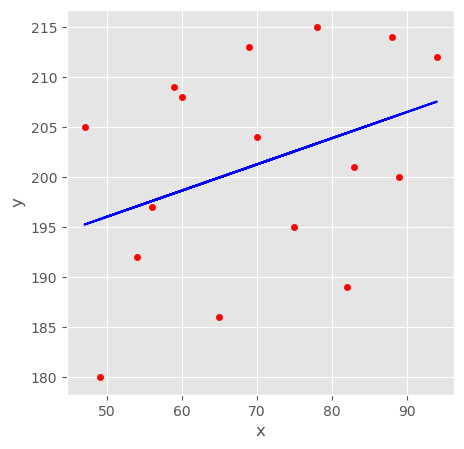

In [6]:
data.plot(kind="scatter",x="x",y="y",figsize=(5,5),color="red")
# Plot regression line
plt.plot(data["x"],prediction,color="blue")

# => 빨간 점: 실제값
# => 파란 선: 선형 방정식

In [7]:
# sklearn.metrics라는 패키지로부터 mean_squared_error 모듈을 불러들임
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 결정계수 R값을 구함
print('score = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))
# 실제값(data[y])과 회귀식 값(prediction)의 차이의 제곱을 구함
print('Mean_absolute_Error = ', mean_absolute_error(prediction, data['y']))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('r2_score = ', r2_score(prediction, data['y']))
# Mean squared error의 제곱근 값을 구함
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.13323317178815952
Mean_absolute_Error =  8.553819314174234
Mean_Squared_Error =  92.68987769190369
r2_score =  -5.505638322489205
RMSE =  9.627558241418418


## 3. X값이 58일때 Y값을 예측하여라.

In [8]:
import sklearn.metrics; dir(sklearn.metrics)
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
mydata = {'x' : [58],
        'y' : []}
prediction = linear_regression.predict(X = pd.DataFrame(mydata["x"]))
print("인구밀도가 58일 때 절도발생률 예측=>", prediction)

인구밀도가 58일 때 절도발생률 예측=> [198.14380581]


/Users/min0/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-----------

a value =  182.97249943723267
b balue = [0.26157425]
[198.40538006 195.78963758 202.59056802 197.09750882 203.37529076
 197.62065731 198.6669543  204.42158775 201.02112253 204.683162
 205.99103324 207.56047873 195.26648908 199.97482554 206.25260749
 201.28269678]
0     10.594620
1    -15.789638
2     -7.590568
3     -5.097509
4     11.624709
5     -0.620657
6      9.333046
7    -15.421588
8     11.978877
9     -3.683162
10     8.008967
11     4.439521
12     9.733511
13   -13.974826
14    -6.252607
15     2.717303
Name: y, dtype: float64
count    1.600000e+01
mean     1.065814e-14
std      9.943299e+00
min     -1.578964e+01
25%     -6.587098e+00
50%      1.048323e+00
75%      9.433162e+00
max      1.197888e+01
Name: y, dtype: float64
SSE =  1483.038043070459
SST =  1711.0
R_squared =  0.13323317178815952
score =  0.13323317178815952
Mean_absolute_Error =  8.553819314174234
Mean_Squared_Error =  92.68987769190369
r2_score =  -5.505638322489205
RMSE =  9.627558241418418
인구밀도가 58일 때 절도발생률

/Users/min0/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


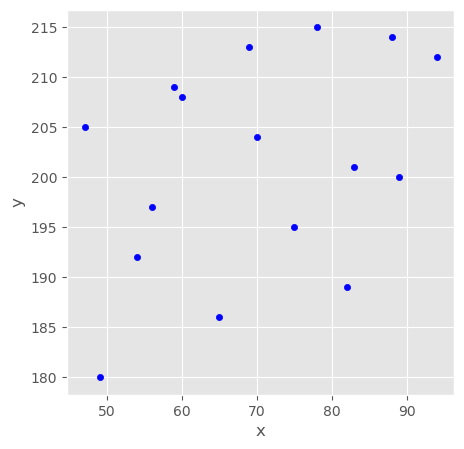

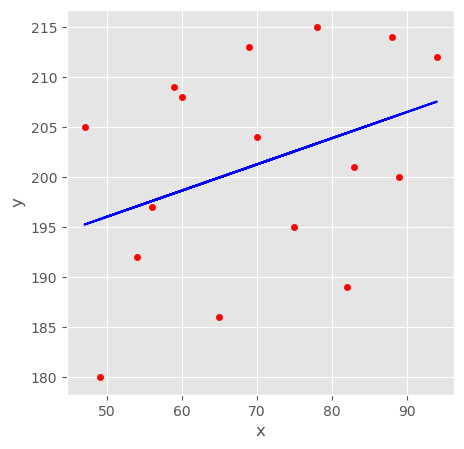

In [1]:
# scikit learn 패키지에서 필요한 모델인 linear_model이라는 모듈을 불러들임
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# matplotlib에는 사전에 정의한 많은 스타일이 있다.
# ggplot도 그 중 하나임
# R에서 사용하는 ggplot을 흉내내는 스타일을 사용하겠다고 선언
matplotlib.style.use('ggplot')

# 2차원 배열을 만들어 'data'라는 변수에 할당
data = {'x' : [59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70],
        'y' : [209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204]}

# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)

data.plot(kind="scatter",  # 산점도를 그리시오
          x='x',           # 가로축은 x라고 라벨을 붙임
          y='y',           # 세로축은 y라고 라벨을 붙임
          figsize=(5,5),   # 가로 5인치, 세로 5인치 크기의 박스를 설정
          color="blue")    # 산점도 상의 점 색상을 파랑색으로 지정

# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# Linearregression()의 fit()이라는 함수를 이용하여 선형회귀 모델 훈련 실행
# x: 독립변수는 y: 종속변수
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])

# 선형 그래프 만들어냄
# 선형 회귀식의 세로축 절편
print('a value = ', linear_regression.intercept_)
# 선형 회귀식의 기울기
print('b balue =', linear_regression.coef_)

# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))
# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다.
print(prediction)
residuals = data["y"] - prediction;  
print(residuals)
# 변수의 갯수(6개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25% 값, 50% 값, 75% 값, 최대값을 출력한다.
print(residuals.describe())
# 잔차를 제곱하여 전체를 합침. 결과값을 SSE라는 변수에 할당
SSE=sse= (residuals**2).sum()
print("SSE = ", SSE);  
# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data["y"]-data["y"].mean())**2).sum()
print("SST = ", SST)
# 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)


# => [50, 58, 60]인데 [198.40538006 195.78963758 .... 206.25260749 201.28269678]로 예측함
# => 예측값과 실제 값 차이는 10.59 -15.78...

data.plot(kind="scatter",x="x",y="y",figsize=(5,5),color="red")
# Plot regression line
plt.plot(data["x"],prediction,color="blue")

# => 빨간 점: 실제값
# => 파란 선: 선형 방정식

# sklearn.metrics라는 패키지로부터 mean_squared_error 모듈을 불러들임
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 결정계수 R값을 구함
print('score = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))
# 실제값(data[y])과 회귀식 값(prediction)의 차이의 제곱을 구함
print('Mean_absolute_Error = ', mean_absolute_error(prediction, data['y']))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('r2_score = ', r2_score(prediction, data['y']))
# Mean squared error의 제곱근 값을 구함
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

import sklearn.metrics; dir(sklearn.metrics)
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
mydata = {'x' : [58],
        'y' : []}
prediction = linear_regression.predict(X = pd.DataFrame(mydata["x"]))
print("인구밀도가 58일 때 절도발생률 예측=>", prediction)